<a href="https://colab.research.google.com/github/annefrancine/Time-series/blob/master/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv("/content/drive/My Drive/curso series temporais (udemy)/Dados/AirPassengers.csv", parse_dates=['Month'], index_col='Month',date_parser=dateparse)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


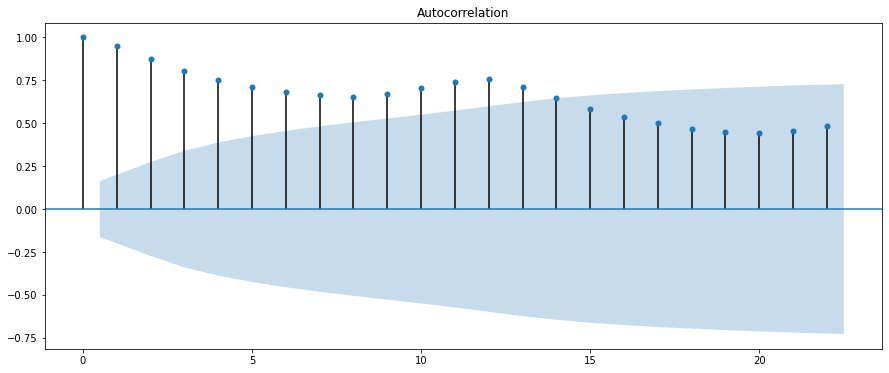

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

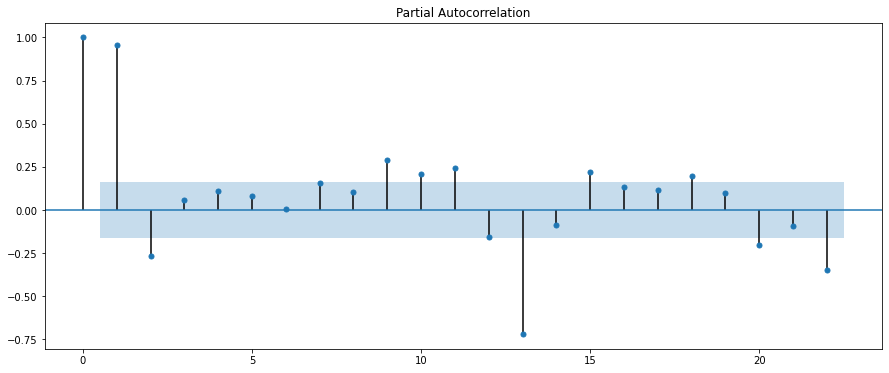

In [7]:
plot_pacf(data)
plt.show()

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -688.248
Method:                       css-mle   S.D. of innovations             29.720
Date:                Thu, 07 May 2020   AIC                           1390.495
Time:                        10:48:30   BIC                           1411.235
Sample:                    02-01-1949   HQIC                          1398.923
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6402      2.016      1.310      0.193      -1.311       6.592
ar.L1.D.#Passengers     0.3120      0.084      3.715      0.000       0.147       0.477
ar.L2.D.#Passeng

In [0]:
from pandas import DataFrame

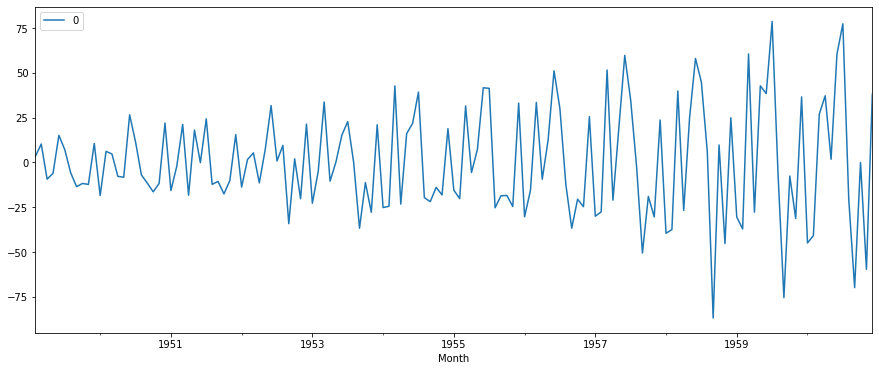

In [11]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

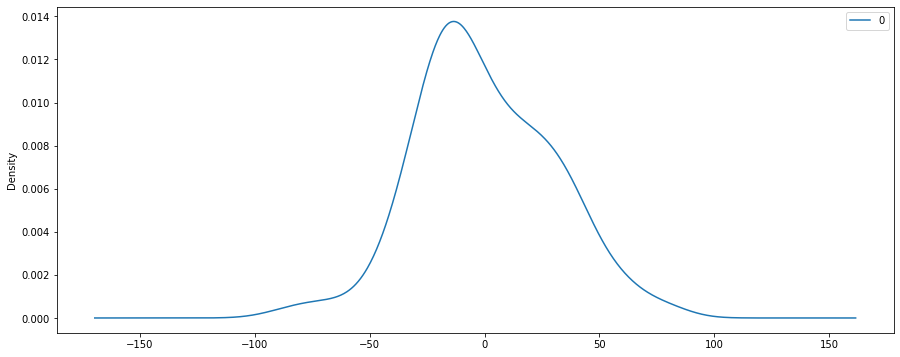

                0
count  143.000000
mean     0.010278
std     29.828334
min    -86.805628
25%    -19.916197
50%     -5.624244
75%     21.573882
max     78.697534


In [12]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [0]:
X = data.values

predicted=383.349021, expected=340.000000
predicted=351.781280, expected=318.000000
predicted=322.739359, expected=362.000000
predicted=372.884435, expected=348.000000
predicted=333.332423, expected=363.000000
predicted=382.493399, expected=435.000000
predicted=435.787753, expected=491.000000
predicted=502.006310, expected=505.000000
predicted=497.701909, expected=404.000000
predicted=347.130076, expected=359.000000
predicted=364.777352, expected=310.000000
predicted=307.297444, expected=337.000000
predicted=394.594979, expected=360.000000
predicted=377.731179, expected=342.000000
predicted=343.945947, expected=406.000000
predicted=419.247994, expected=396.000000
predicted=377.269080, expected=420.000000
predicted=433.784155, expected=472.000000
predicted=462.008879, expected=548.000000
predicted=569.727740, expected=559.000000
predicted=544.074795, expected=463.000000
predicted=418.350436, expected=407.000000
predicted=395.543467, expected=362.000000
predicted=369.154106, expected=405

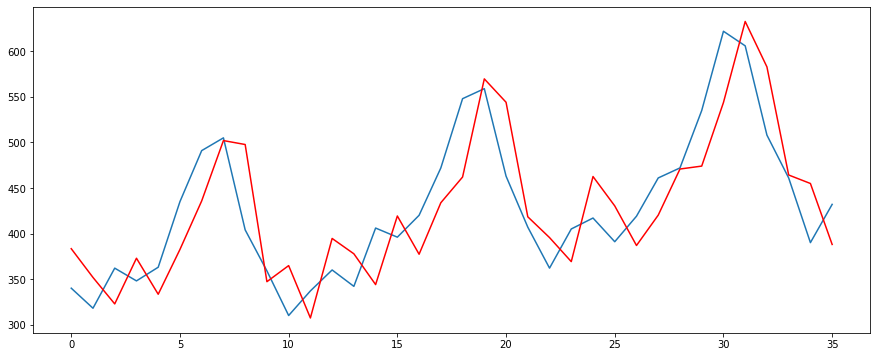

In [14]:
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()